## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [2]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_aus = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_aus.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: Australia


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,australia,01/01/1970,62.3,55.1,59.9,NaN,NaN,0.0,NaN,19.5,NaN,NaN,97.5,82.74,Overcast
1,australia,01/02/1970,53.9,50.3,51.9,NaN,NaN,0.0,NaN,18.3,NaN,NaN,93.8,78.11,Overcast
2,australia,01/03/1970,56.0,48.8,52.3,43.4,NaN,0.0,NaN,15.0,NaN,NaN,100.0,85.87,Overcast
3,australia,01/04/1970,64.1,51.2,56.3,NaN,NaN,0.0,NaN,16.1,NaN,NaN,91.3,83.15,Overcast
4,australia,01/05/1970,72.2,50.3,61.4,NaN,NaN,0.0,NaN,11.4,NaN,NaN,75.0,71.98,Partially cloudy


### Random Slice of Data
<hr>

In [3]:
df_aus.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
15189,australia,08/03/2011,69.9,35.9,50.1,31.0,NaN,0.00,NaN,11.4,NaN,6.5,17.7,67.30,Clear
14053,australia,06/23/2008,54.0,34.4,43.6,30.8,NaN,0.00,NaN,10.3,NaN,9.0,72.1,81.63,Partially cloudy
18334,australia,03/13/2020,76.9,48.2,62.6,46.6,NaN,0.00,NaN,17.2,NaN,6.2,11.5,68.92,Clear
18493,australia,08/19/2020,51.8,41.2,45.0,33.9,NaN,0.24,NaN,21.8,33.3,6.2,47.5,81.13,"Rain, Partially cloudy"
15134,australia,06/09/2011,55.5,35.4,43.8,29.3,NaN,0.06,NaN,15.0,NaN,7.3,55.5,68.92,"Rain, Partially cloudy"


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [4]:
df_aus.shape

(18570, 15)

In [5]:
#printing missing data sum
df_aus.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill             10058
Heat Index             15539
Precipitation              0
Snow Depth             18539
Wind Speed                 0
Wind Gust              18401
Visibility              1107
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

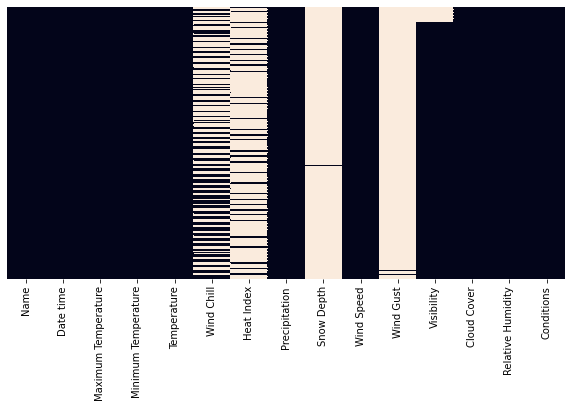

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df_aus.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [7]:
df_aus.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [8]:
df_aus.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18565,australia,10/30/2020,67.9,44.9,56.9,0.0,19.7,6.2,68.8,81.20,Partially cloudy
18566,australia,10/31/2020,58.9,51.7,54.4,0.0,15.0,6.1,95.4,92.79,Overcast
18567,australia,11/01/2020,69.7,51.7,58.4,0.0,21.9,6.2,81.1,71.76,Overcast
18568,australia,11/02/2020,69.7,42.7,57.9,0.0,10.3,6.2,61.0,71.66,Partially cloudy
18569,australia,11/03/2020,75.1,48.1,61.1,0.0,10.3,6.2,92.9,75.28,Overcast


In [9]:
#Mean Imputing for visibility
df_aus['Visibility'].fillna(df_aus['Visibility'].mean(), inplace = True)
print(df_aus.isnull().sum())

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [10]:
#minimum value for temperature
df_aus['Temperature'].min()

30.4

In [11]:
#maximum value for temperature
df_aus['Temperature'].max()

93.7

In [12]:
#minimim value for temperature
df_aus['Precipitation'].min()

0.0

In [13]:
#maximum value for precipitation
df_aus['Precipitation'].max()

4.33

In [14]:
#ToDO - Update feature details

In [15]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Humidity affects Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [16]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_aus.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_aus['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [17]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.0,19.5,16.560013,97.5,82.74
1,0.0,18.3,16.560013,93.8,78.11
2,0.0,15.0,16.560013,100.0,85.87
3,0.0,16.1,16.560013,91.3,83.15
4,0.0,11.4,16.560013,75.0,71.98


In [18]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [19]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_aus.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_aus['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [20]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

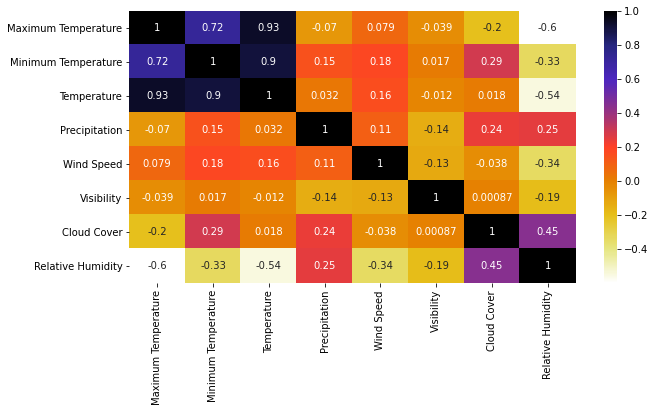

In [21]:
plt.figure(figsize=(10,5))
c= df_aus.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is inversely correlated with Visibility and relative humidity and not much correlation with Cloud cover,Wind Speed and precipitation

For `Precipitation`, It is not highly correlated with any other feature, but slightly correlated with Cloud cover and Relative Humidity and almost inverse correlation with Maximum Temperature

In [ ]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_aus[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation expect for Relative Humidity , it is inverse

For Precipitation, we can see majority of values are not correlated in any way. It lies in the range of 0-1 for many feature values.There is no obvious relation between any features and precipitation. There is a slight correaltion with Cloud cover, Visibility, Wind speed and relative humidity.

#### 3.3 Using Feature Transformation for conditions

In [ ]:
df_aus['Conditions'] = df_aus['Conditions'].astype('category')

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df_aus['Conditions']= label_encoder.fit_transform(df_aus['Conditions'])

In [ ]:
#df_aus  = pd.concat([df_aus,df_aus_conditions],axis=1)

In [ ]:
df_aus.head()

## Regression

In [ ]:
plt.hist(df_aus['Temperature'])

In [ ]:
plt.hist(df_aus['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [ ]:
X_temp=df_aus.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Name','Date time'],axis=1)
Y_temp=df_aus.Temperature

#### Importing the train test split function for Temperature

In [ ]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp)

In [ ]:
train_X_temp.head()

In [ ]:
train_y_temp.head()

In [ ]:
#getting the shape for training data
train_X_temp.shape

In [ ]:
train_y_temp.shape

In [ ]:
#getting the shape for test data
test_X_temp.shape

### 1. Implementing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
import math

In [ ]:
lr = LR(normalize=True)
lr.fit(train_X_temp,train_y_temp)
y_pred_1=lr.predict(test_X_temp)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_temp)
k = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(k) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
k = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(k) )

### Ridge Regression

In [ ]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_temp,train_y_temp)
y_predict=model.predict(test_X_temp)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_temp)
ridge_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
ridge_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )
ridge_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Ridge regression',ridge_r2_score)

### Residual Plot in Ridge Regression

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Ridge Regression")

### Knn Algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [ ]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_temp,train_y_temp)
y1_knn=knn.predict(test_X_temp)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

### Residual plot in KNN

In [ ]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_X_temp,train_y_temp)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

### Residual plot in Gradient Boosting

In [ ]:
preds = pd.DataFrame({"preds":xgb.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Random Forest Regression")

### Decision Tree Regressor

In [ ]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_temp,train_y_temp)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

### Residual Plot in Decision Tree Regressor

In [ ]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

###  Support Vector Regression for Temperature

#### Pre processing features

In [ ]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_temp,train_y_temp)
pred1=model1.predict(test_X_temp)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

### Residual Plot for Support Vector Machine

In [ ]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [ ]:
train_error=[ridge_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[ridge_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','XGBoost Regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

In [ ]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [ ]:
test_r2_square_error=[ridge_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square Error':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

In [ ]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [ ]:
X_prec=df_aus.drop(columns=['Precipitation','Name','Date time','Maximum Temperature','Minimum Temperature','Temperature'],axis=1)
Y_prec=df_aus.Precipitation

In [ ]:
X_prec.head()

#### Importing the train test split function for Precipitation

In [ ]:
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec)

### Ridge Regression

In [ ]:
model=linear_model.Ridge()
model.fit(train_X_prec,train_y_prec)
y_predict=model.predict(test_X_prec)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_prec)
ridge_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = model.predict(test_X_prec)
ridge_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )

### Knn Algorithm

In [ ]:
#Preprocessing features
x_scaled=StandardScaler()
train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [ ]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

### Decision Tree Regressor

In [ ]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )

### Gradient Boosting Regressor

In [ ]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

### Support Vector Regression for Precipitation

In [ ]:
model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )

### Getting the Graph for all Models RMSE

In [ ]:
train_error=[ridge_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[ridge_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','XGBoost regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

In [ ]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.legend(loc='lower right')
plt.show()